In [ ]:
from ngsolve import *
from ngsolve.meshes import Make1DMesh
from ngsolve.webgui import Draw
import numpy as np
import math

In [ ]:
from sympy import symbols, simplify, solve, diff, lambdify
import sympy as sym
from sympy import Symbol
import scipy.integrate
import matplotlib.pyplot as plt
mesh = Make1DMesh(100)

time = 0.0
dt = 0.5

t = Parameter(0.0)

# k_1 = 7.853

# w_ex = (cosh(k_1*x) - cos(k_1*x) + ((cosh(k_1) - cos(k_1))*(sin(k_1*x) - sinh(k_1*x)))/(sinh(k_1) - sin(k_1)))

# mesh = Make1DMesh(40)
# x=np.linspace(0,1,100)
# w_ex(mesh(x))

# plt.plot(x,w_ex(mesh(x)),color='black',label='P = 4.1$\pi^2$',linestyle="-")


u_ex = x*(1-x)*sin(4*pi*x)*t**2*exp(-t)


# scene = Draw(u_ex,mesh, deformation=CF( (0,u_ex,0) ))

mesh = Make1DMesh(80)
x=np.linspace(0,1,100)
u_ex(mesh(x))

tstep = 10 # time that we want to step over within one block-run
t_intermediate=0 # time counter within one block-run

from time import sleep
while t_intermediate < tstep - 0.5 * dt:
    t.Set(time+t_intermediate)
    plt.ylim([-0.2, 0.2])
    plt.xlim([0, 1])
    font1 = {'family':'serif','color':'black','size':15}
    plt.title("Exact Solution",fontdict = font1)
    plt.xlabel('x',fontdict = font1)
    plt.ylabel('u(x,t)',fontdict = font1)
    plt.plot(x,u_ex(mesh(x)),color='black',linestyle="-")
    plt.show()
    t_intermediate += dt
    print("\r",time+t_intermediate,end="")
print("")
time+=t_intermediate

In [ ]:
from ngsolve import *
from ngsolve.meshes import Make1DMesh
from ngsolve.webgui import Draw
import numpy as np
import math

In [ ]:
from sympy import symbols, simplify, solve, diff, lambdify
import sympy as sym

X,T, A1, A2, A3, A4 = symbols("x t A1 A2 A3 A4")
w_ex = (A1*sym.sin(X) + A2*sym.cos(X) + A3*sym.sinh(X) + A4*sym.cosh(X))*T
w_diff_ex = diff(w_ex,T)

# # solve for boundary conditions
# solve_bc = solve((w_ex.subs(X,0), w_diff_ex.subs(X,0), w_ex.subs(X,1), w_diff_ex.subs(X,1)), A1, A2, A3, A4)



# a1,a2,a3,a4 = solve_bc[A1], solve_bc[A2], solve_bc[A3], solve_bc[A4]

# # generate CoefficientFunctions
# w_ex_func = lambdify((X), w_ex.subs([(A1,a1),(A2,a2),(A3,a3),(A4,a4)]))
# cf_w_ex = w_ex_func(x)

w_diff_ex

In [1]:
from ngsolve import *
from ngsolve.meshes import Make1DMesh
from ngsolve.webgui import Draw
import numpy as np
import math 

In [2]:
from sympy import symbols, simplify, solve, diff, lambdify
import sympy as sym
from sympy import Symbol
import scipy.integrate
import matplotlib.pyplot as plt
mesh = Make1DMesh(100)

X,T = symbols("x t")

u_x = X*(1-X)*sym.sin(4*sym.pi*X)*T**2*sym.exp(-T)

u_diff_x = diff(u_x, X)

u_ddiff_x = diff(u_diff_x,X)

u_dddiff_x = diff(u_ddiff_x,X)

u_ddddiff_x = diff(u_dddiff_x,X)

u_diff_t = diff(u_x, T)

u_ddiff_t = diff(u_diff_t,T)

f_x_t = u_ddddiff_x + u_ddiff_t

f = (T**2*X*(1-X) + 256*sym.pi**4*T**2*X*(1-X) + 192*sym.pi**2*T**2 - 4*T*X*(1-X) + 2*X*(1-X))*(sym.exp(-T)*sym.sin(4*sym.pi*X)) \
                      + (2*X - 1)*256*sym.pi**3*T**2*sym.exp(-T)*sym.cos(4*sym.pi*X)

f

pi**3*t**2*(512*x - 256)*exp(-t)*cos(4*pi*x) + (t**2*x*(1 - x) + 256*pi**4*t**2*x*(1 - x) + 192*pi**2*t**2 - 4*t*x*(1 - x) + 2*x*(1 - x))*exp(-t)*sin(4*pi*x)

In [3]:
u = H1(mesh, order=2, dirichlet="left|right")
sigma = H1(mesh, order=2, dirichlet=" ")
u_1 = H1(mesh, order=2, dirichlet="left|right")
fesm = u*sigma*u_1

In [4]:
u, sigma, u_1= fesm.TrialFunction()
v, tau, v_1 = fesm.TestFunction()

time = 0.0
dt = 0.5

In [5]:
a = BilinearForm(fesm, symmetric=False)
a += -grad(sigma)*grad(v)*dx + sigma*tau*dx + grad(u)*grad(tau)*dx -u_1*v_1*dx
a.Assemble()

m = BilinearForm(fesm, symmetric=False)
m += u_1*v*dx - u*v_1*dx
m.Assemble()

In [6]:
mstar = m.mat.CreateMatrix()
# print(m.mat.nze, a.mat.nze, mstar.nze)
# print(mstar)

In [7]:
print(mstar.nze)
print(len(mstar.AsVector()))

7209
7209


In [8]:
print(mstar.AsVector())

       0
       0
       0
       0
       0
       0
 0.00333333
 0.00166667
 -0.000416667
       0
       0
       0
       0
       0
       0
       0
       0
       0
       0
 0.00166667
 0.00666667
 0.00166667
 -0.000416667
 -0.000416667
       0
       0
       0
       0
       0
       0
       0
       0
       0
       0
 0.00166667
 0.00666667
 0.00166667
 -0.000416667
 -0.000416667
       0
       0
       0
       0
       0
       0
       0
       0
       0
       0
 0.00166667
 0.00666667
 0.00166667
 -0.000416667
 -0.000416667
       0
       0
       0
       0
       0
       0
       0
       0
       0
       0
 0.00166667
 0.00666667
 0.00166667
 -0.000416667
 -0.000416667
       0
       0
       0
       0
       0
       0
       0
       0
       0
       0
 0.00166667
 0.00666667
 0.00166667
 -0.000416667
 -0.000416667
       0
       0
       0
       0
       0
       0
       0
       0
       0
       0
 0.00166667
 0.00666667
 0.00166667
 -0.00041666

In [9]:
mstar = m.mat.CreateMatrix()
mstar.AsVector().data = m.mat.AsVector() + dt * a.mat.AsVector()
invmstar = mstar.Inverse(freedofs=fesm.FreeDofs())

In [10]:
t = Parameter(0.0)

In [14]:
gausspt =(t**2*x*(1-x) + 256*pi**4*t**2*x*(1-x) + 192*pi**2*t**2 - 4*t*x*(1-x) + 2*x*(1-x))*(exp(-t)*sin(4*pi*x)) \
                      + (2*x - 1)*256*pi**3*t**2*exp(-t)*cos(4*pi*x) 

gfu = GridFunction(fesm)
ft = LinearForm(fesm)
ft += gausspt*v*dx
time = 0.0
t.Set(0.0)
gfu.components[2].Set(0.0)


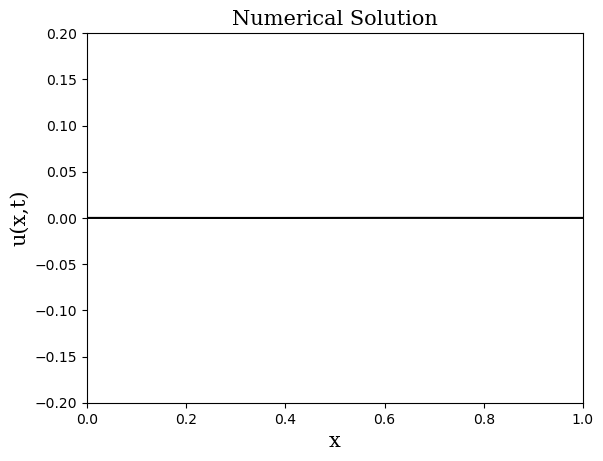

 0.5

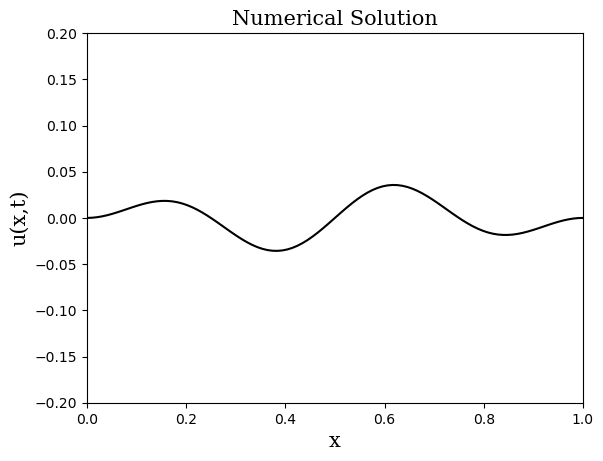

 1.0

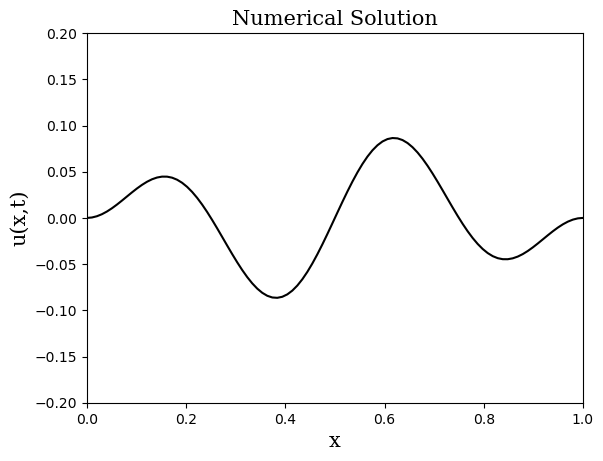

 1.5

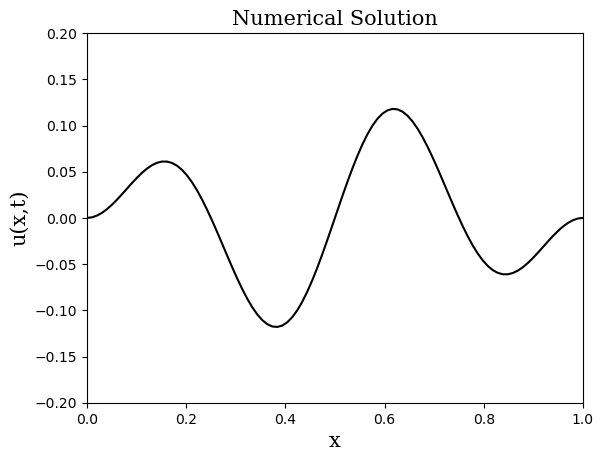

 2.0

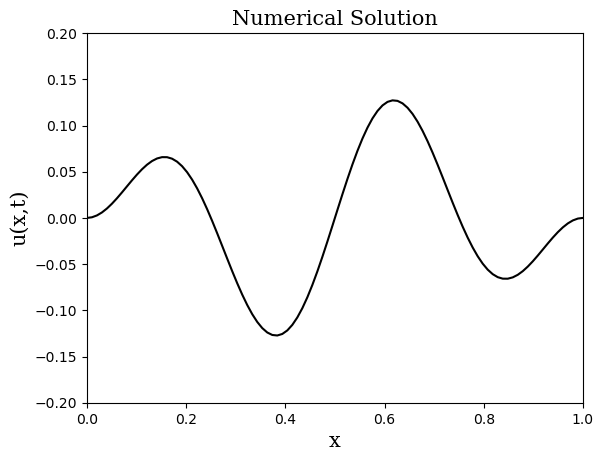

 2.5

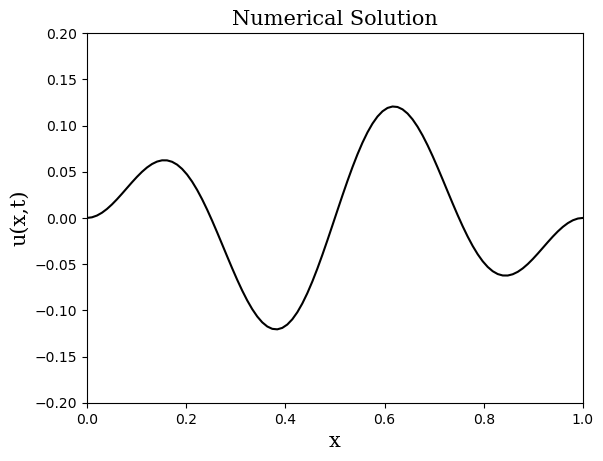

 3.0

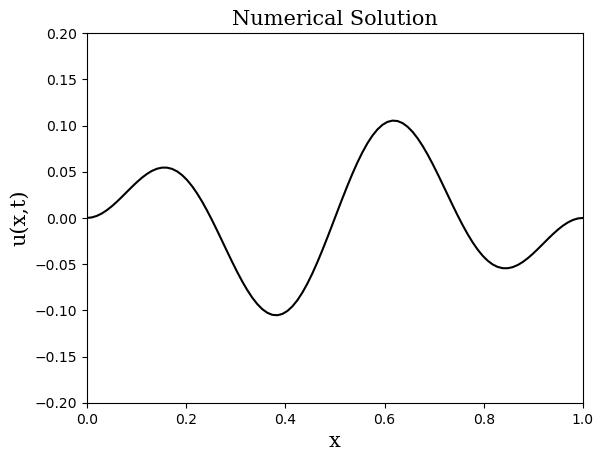

 3.5

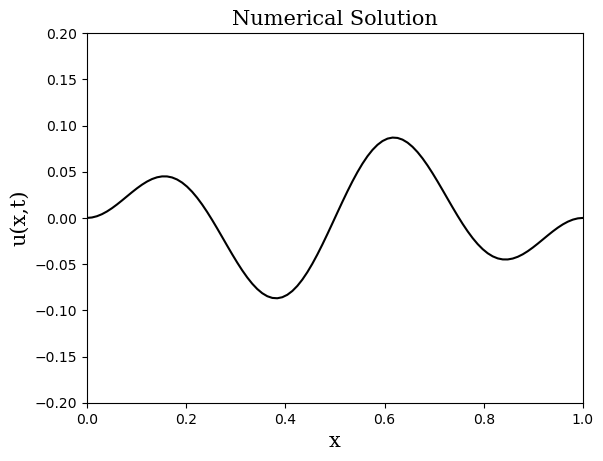

 4.0

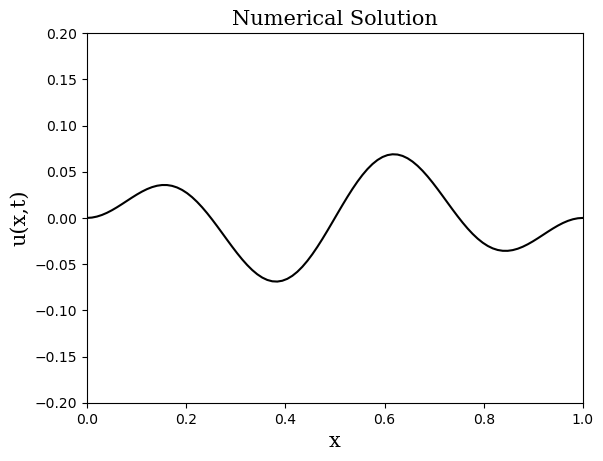

 4.5

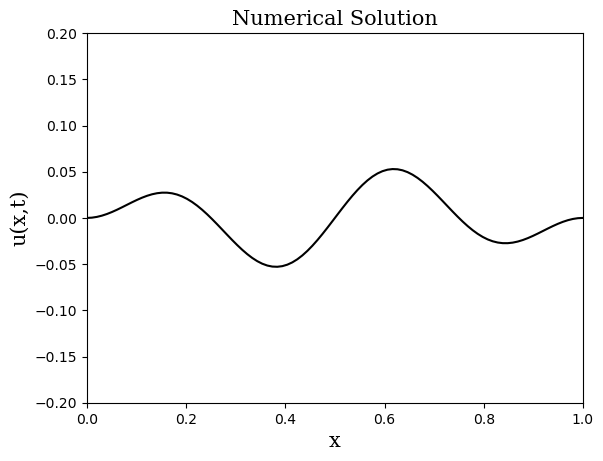

 5.0

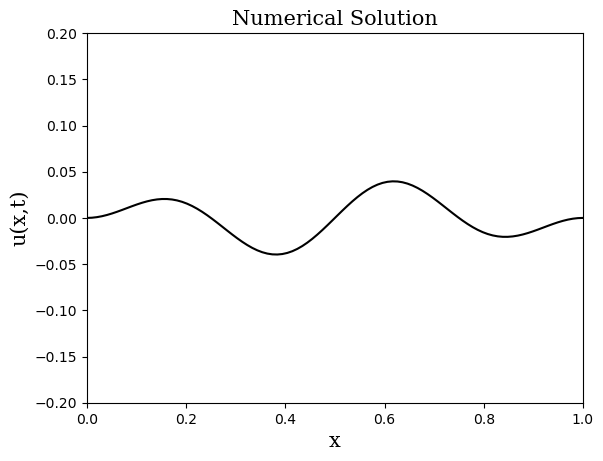

 5.5

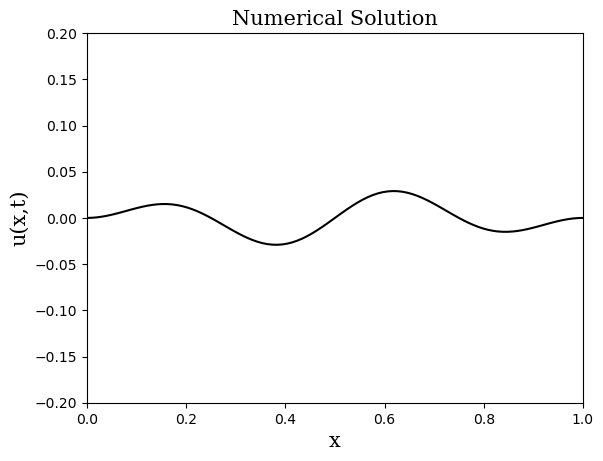

 6.0

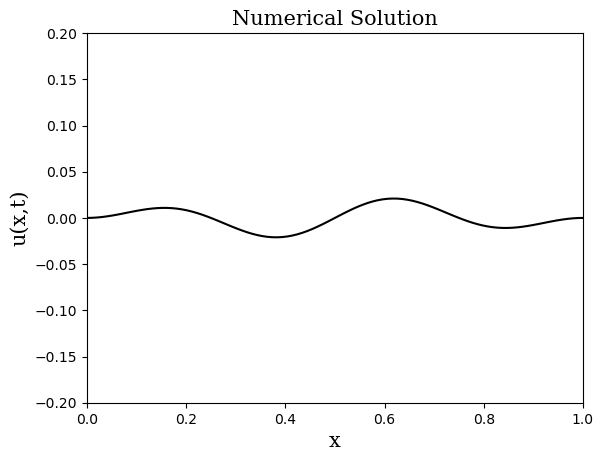

 6.5

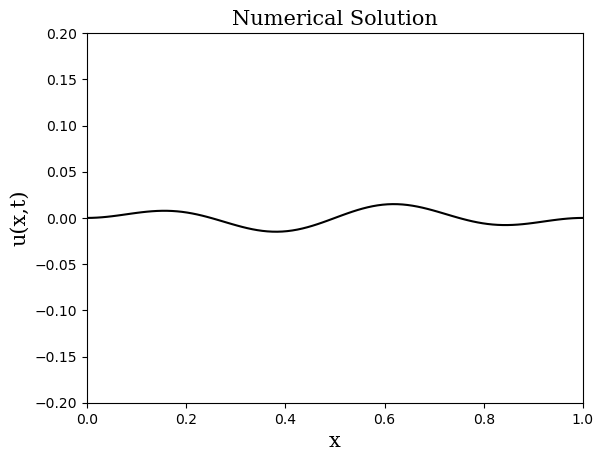

 7.0

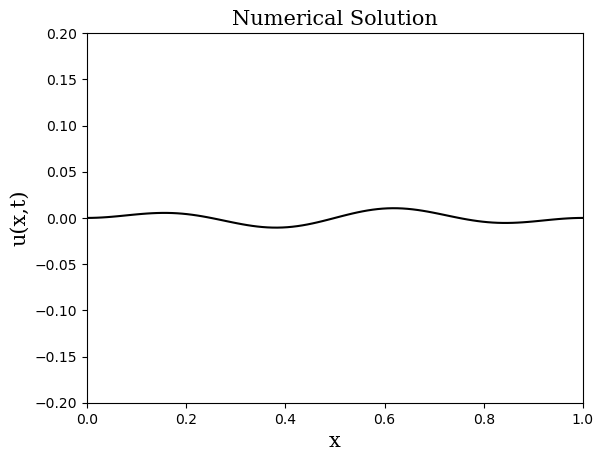

 7.5

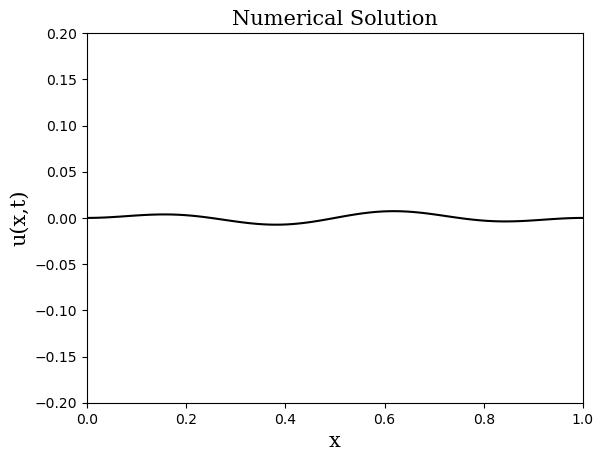

 8.0

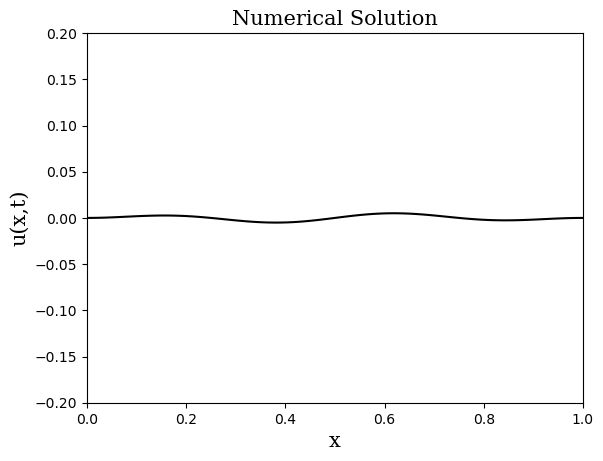

 8.5

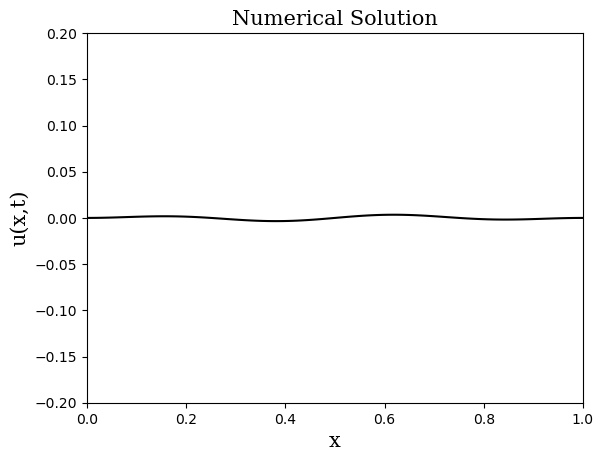

 9.0

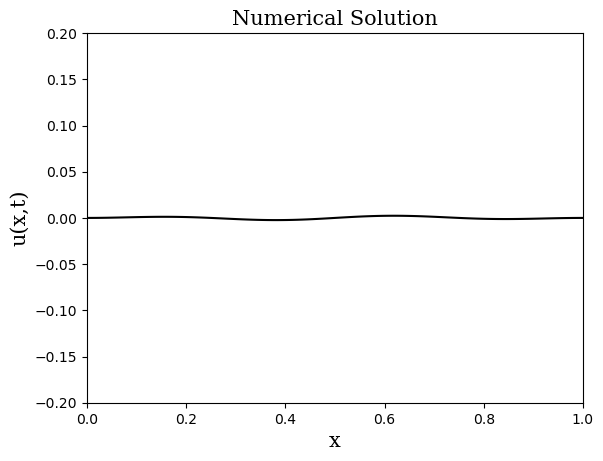

 9.5

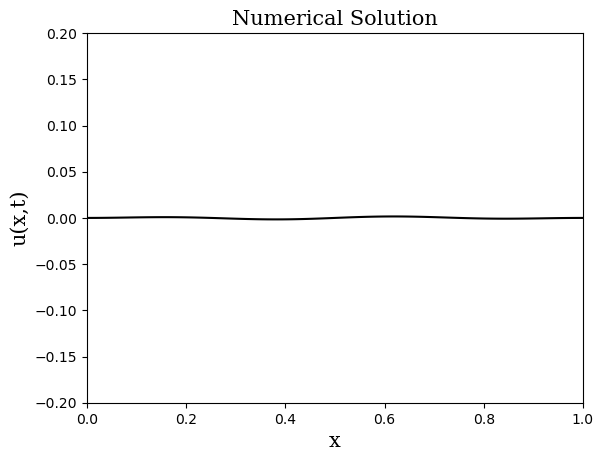

 10.0


In [15]:
mesh = Make1DMesh(80)
x=np.linspace(0,1,100)
gfu.components[0](mesh(x))

tstep = 10 # time that we want to step over within one block-run
t_intermediate=0 # time counter within one block-run
res = gfu.vec.CreateVector()
while t_intermediate < tstep - 0.5 * dt:
    t.Set(time+t_intermediate)
    ft.Assemble() 
    res.data = dt * ft.vec - dt * a.mat * gfu.vec
    gfu.vec.data += invmstar * res
    t_intermediate += dt
    plt.ylim([-0.2, 0.2])
    plt.xlim([0, 1])
    font1 = {'family':'serif','color':'black','size':15}
    plt.title("Numerical Solution",fontdict = font1)
    plt.xlabel('x',fontdict = font1)
    plt.ylabel('u(x,t)',fontdict = font1)
    plt.plot(x,gfu.components[0](mesh(x)),color='black',linestyle="-")
    plt.show()
    print("\r",time+t_intermediate,end="")
print("")
time+=t_intermediate

In [ ]:
print ("L2-error:", sqrt(Integrate((gfu.components[0] - u_ex)**2, mesh)))